In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display, Markdown, Latex
%matplotlib widget
from matplotlib.widgets import Slider
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [3]:
def my_softmax(z):
    ez = np.exp(z)              #element-wise exponenial
    sm = ez/np.sum(ez)
    return(sm)

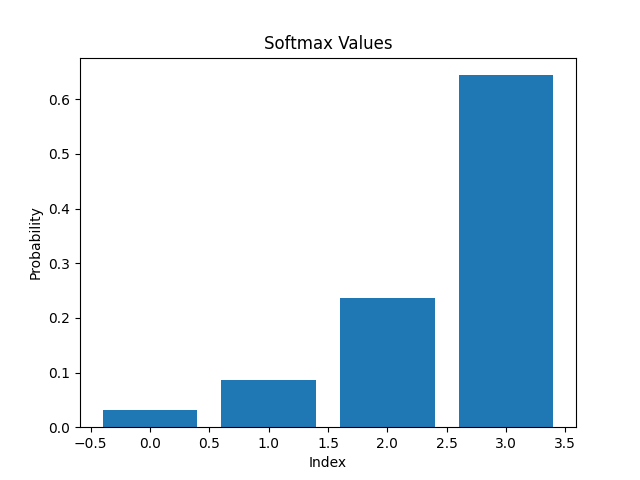

In [6]:
def plt_softmax(values):
    sm_values = my_softmax(values)  # Apply softmax to input values
    
    # Create a new figure for plotting
    fig, ax = plt.subplots()
    
    # Plot the softmax values
    ax.bar(range(len(sm_values)), sm_values)
    
    # Set labels and title
    ax.set_title("Softmax Values")
    ax.set_xlabel("Index")
    ax.set_ylabel("Probability")
    
    # Display the plot
    plt.show()

# Example usage
values = np.array([1.0, 2.0, 3.0, 4.0])
plt_softmax(values)

In [9]:
import numpy as np

def make_blobs(n_samples, centers, cluster_std=1.0, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    n_centers = len(centers)
    n_features = len(centers[0])
    
    # Split samples roughly equally across centers
    samples_per_center = [n_samples // n_centers] * n_centers
    for i in range(n_samples % n_centers):
        samples_per_center[i] += 1
    
    X = []
    y = []
    
    # Generate samples for each center
    for idx, (center, n_samples_for_center) in enumerate(zip(centers, samples_per_center)):
        # Generate points around the center using a normal distribution
        points = np.random.normal(loc=center, scale=cluster_std, size=(n_samples_for_center, n_features))
        X.append(points)
        y += [idx] * n_samples_for_center
    
    X = np.vstack(X)
    y = np.array(y)
    
    return X, y

# Example usage
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0, random_state=30)


In [10]:
model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'softmax')    # < softmax activation here
    ]
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X_train,y_train,
    epochs=10
)
        

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - loss: 1.2384 
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.6036
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 0.2498
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.1155
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 0.0837
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 0.0584
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 0.0502
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.0410
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - loss: 0.0499
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 0.0344


In [11]:
p_nonpreferred = model.predict(X_train)
print(p_nonpreferred [:2])
print("largest value", np.max(p_nonpreferred), "smallest value", np.min(p_nonpreferred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step
[[9.9994731e-01 2.1865333e-05 3.0214125e-05 6.6616303e-07]
 [9.9984127e-01 8.7005174e-05 6.7025030e-05 4.7795647e-06]]
largest value 0.9999987 smallest value 1.00521765e-10


In [12]:
preferred_model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'linear')   #<-- Note
    ]
)
preferred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #<-- Note
    optimizer=tf.keras.optimizers.Adam(0.001),
)

preferred_model.fit(
    X_train,y_train,
    epochs=10
)
        

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 1.3238 
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - loss: 0.5241
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 0.2077
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.1249
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 0.0742
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 0.0658
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 0.0557
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 0.0455
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 0.0479
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 0.0332


In [13]:
p_preferred = preferred_model.predict(X_train)
print(f"two example output vectors:\n {p_preferred[:2]}")
print("largest value", np.max(p_preferred), "smallest value", np.min(p_preferred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
two example output vectors:
 [[ 6.950538  -2.156409  -3.8317163 -7.5911283]
 [ 6.5093417 -0.9465695 -4.5240273 -6.664524 ]]
largest value 11.540578 smallest value -10.266293


In [14]:
sm_preferred = tf.nn.softmax(p_preferred).numpy()
print(f"two example output vectors:\n {sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

two example output vectors:
 [[9.99867916e-01 1.10878114e-04 2.07619978e-05 4.83701399e-07]
 [9.99404252e-01 5.77670406e-04 1.61439530e-05 1.89847015e-06]]
largest value 0.99999547 smallest value 1.2818959e-08


In [15]:
for i in range(5):
    print( f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")

[ 6.950538  -2.156409  -3.8317163 -7.5911283], category: 0
[ 6.5093417 -0.9465695 -4.5240273 -6.664524 ], category: 0
[ 5.5491514 -1.0423592 -3.6169457 -5.9959173], category: 0
[ 7.5373597 -1.9935744 -4.4229016 -7.847894 ], category: 0
[ 4.717175    0.83832145 -4.393902   -5.137975  ], category: 0
